In [1]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd


## Video Analysis using FER

In [17]:
# Put in the location of the video file that has to be processed
location_videofile = "assets/video.mp4"


In [18]:
# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [19]:
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:25.00 fps, 206 frames, 8.24 seconds
INFO:fer:Making directories at output


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'output\\video_output.mp4'

In [6]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)


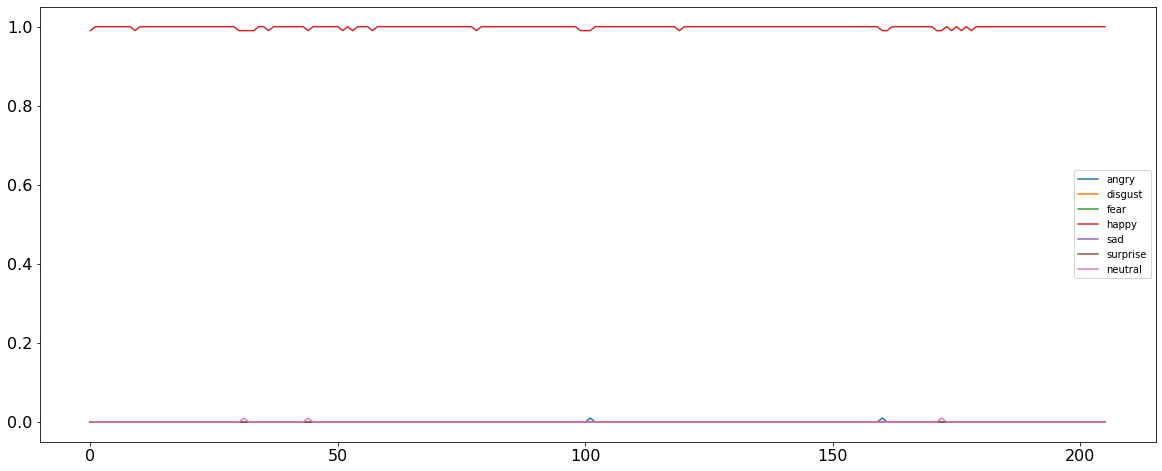

In [7]:
# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()


In [8]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]


In [9]:
score_comparisons = pd.DataFrame(emotions, columns=['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons


,Human Emotions,Emotion Value from the Video
0,Angry,0.02
1,Disgust,0.00
2,Fear,0.00
3,Happy,205.77
4,Sad,0.00
5,Surprise,0.00
6,Neutral,0.03
